In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

file_path = "/content/drive/MyDrive/Feature_Selection/diabetes.csv"
df = pd.read_csv(file_path)

df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]
feature_names = X.columns


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X, y)


RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
import numpy as np

importances = rf.feature_importances_

gini_table = sorted(zip(importances, feature_names), reverse=True)

print("🔹 Random Forest Gini Index Feature Ranking:\n")
for score, name in gini_table:
    print(f"{name}: {score:.4f}")


🔹 Random Forest Gini Index Feature Ranking:

Glucose: 0.2552
BMI: 0.1671
Age: 0.1367
DiabetesPedigreeFunction: 0.1235
BloodPressure: 0.0903
Pregnancies: 0.0850
Insulin: 0.0754
SkinThickness: 0.0669


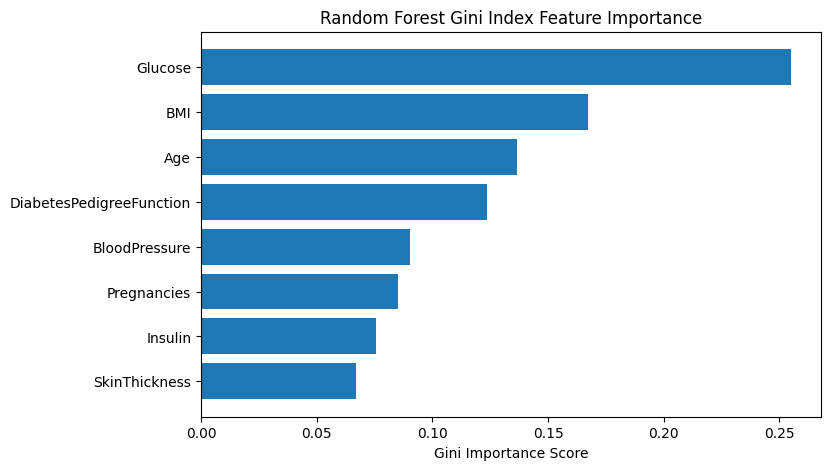

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get importance values from RF model
importances = rf.feature_importances_
features = X.columns

# Sort values high → low
sorted_idx = np.argsort(importances)[::-1]
sorted_features = features[sorted_idx]
sorted_importance = importances[sorted_idx]

# Create horizontal bar plot
plt.figure(figsize=(8, 5))
plt.barh(sorted_features, sorted_importance)
plt.gca().invert_yaxis()  # Highest at top
plt.xlabel("Gini Importance Score")
plt.title("Random Forest Gini Index Feature Importance")
plt.show()


In [ ]:
!pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=a30432bdac4f8df59579ec50c122b53c781b91ceb194cc36d817f7d7608730a8
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


In [ ]:
import pandas as pd

file_path = "/content/drive/MyDrive/Feature_Selection/diabetes.csv"
df = pd.read_csv(file_path)

df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]
feature_names = X.columns


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X, y)


RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    training_data=X.values,
    feature_names=feature_names,
    class_names=["No Diabetes", "Diabetes"],
    mode='classification'
)


In [ ]:
import numpy as np

sample_id = np.random.randint(0, len(X))    # pick any sample
sample = X.iloc[sample_id]

exp = explainer.explain_instance(
    data_row=sample.values,
    predict_fn=rf.predict_proba
)

exp.show_in_notebook(show_table=True)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
lime_scores = exp.as_list()

print("\n🔹 LIME Feature Importance for this sample:\n")
for feature, score in lime_scores:
    print(feature, "=>", round(score, 4))



🔹 LIME Feature Importance for this sample:

BMI <= 27.30 => -0.1848
Pregnancies > 6.00 => 0.0994
DiabetesPedigreeFunction > 0.63 => 0.0889
Age > 41.00 => 0.0665
30.50 < Insulin <= 127.25 => -0.043
117.00 < Glucose <= 140.25 => 0.0334
0.00 < SkinThickness <= 23.00 => -0.0256
62.00 < BloodPressure <= 72.00 => -0.0076


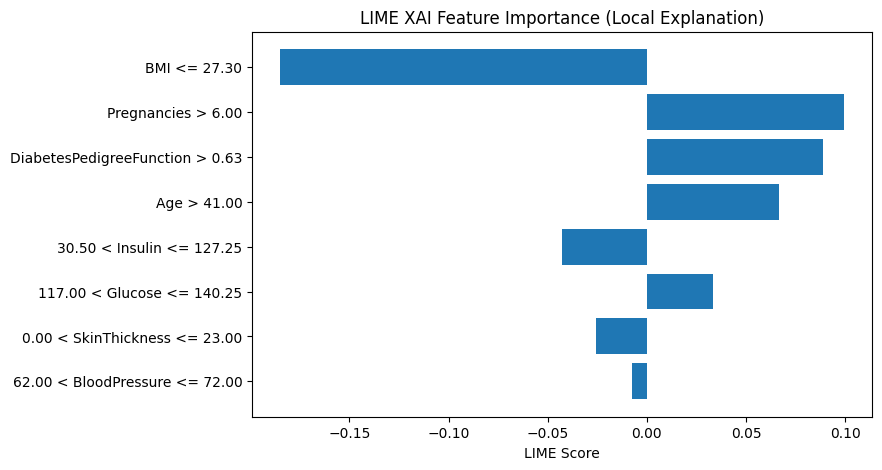

In [ ]:
import matplotlib.pyplot as plt

# Separate names and scores
names = [x[0] for x in lime_scores]
scores = [x[1] for x in lime_scores]

plt.figure(figsize=(8,5))
plt.barh(names, scores)
plt.title("LIME XAI Feature Importance (Local Explanation)")
plt.xlabel("LIME Score")
plt.gca().invert_yaxis()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from lime import lime_tabular

# ---------------------------------------------
# 1. Create LIME Explainer (same as before)
# ---------------------------------------------
explainer = lime_tabular.LimeTabularExplainer(
    training_data=X.values,
    feature_names=feature_names,
    class_names=["No Diabetes", "Diabetes"],
    mode='classification'
)

lime_importances = {f: [] for f in feature_names}

print("Running LIME on the FULL dataset... This will take time.\n")

for i in range(len(X)):        # FULL DATASET
    sample = X.iloc[i]

    exp = explainer.explain_instance(
        data_row=sample.values,
        predict_fn=rf.predict_proba
    )

    # extract weights
    for feature, weight in exp.as_list():
        # feature looks like: "Glucose <= 120"
        feature_name = feature.split()[0]
        if feature_name in lime_importances:
            lime_importances[feature_name].append(abs(weight))


lime_global = {
    feature: np.mean(weights) if len(weights) > 0 else 0
    for feature, weights in lime_importances.items()
}

lime_global_df = pd.DataFrame({
    'Feature': list(lime_global.keys()),
    'LIME_Importance': list(lime_global.values())
})

lime_global_df = lime_global_df.sort_values(
    by="LIME_Importance", ascending=False
)

print("\n🔹 LIME Global Feature Importance (FULL DATASET):\n")
print(lime_global_df)


Running LIME on the FULL dataset... This will take time.



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local


🔹 LIME Global Feature Importance (FULL DATASET):

                    Feature  LIME_Importance
1                   Glucose         0.253868
5                       BMI         0.153898
7                       Age         0.081142
6  DiabetesPedigreeFunction         0.077085
0               Pregnancies         0.061295
2             BloodPressure         0.021050
3             SkinThickness         0.015056
4                   Insulin         0.014139


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


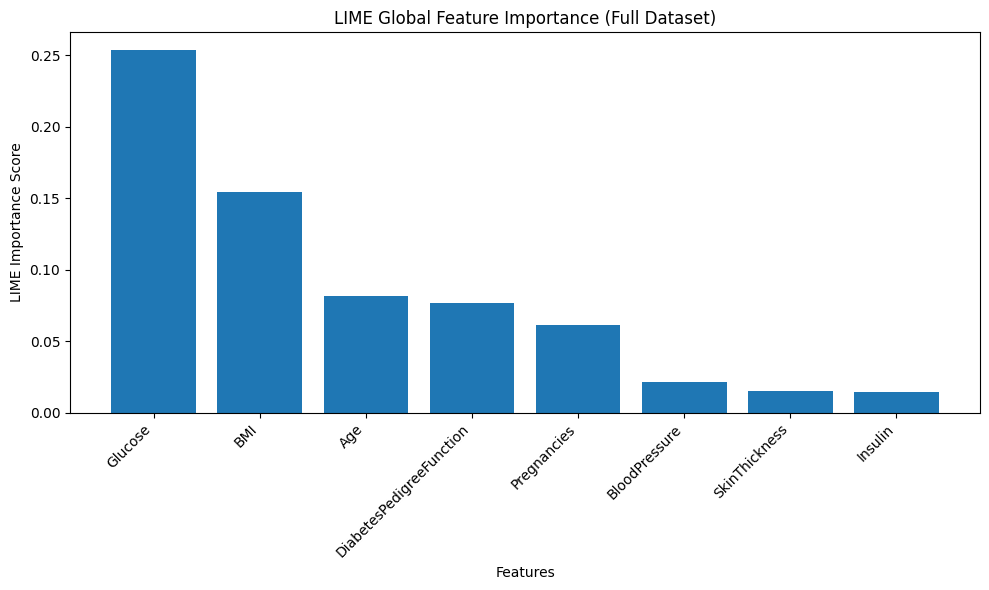

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# 👉 Replace this with your full LIME results
lime_df = pd.DataFrame({
    'Feature': ['Glucose','BMI','Age','DiabetesPedigreeFunction','Pregnancies',
                'BloodPressure','SkinThickness','Insulin'],
    'LIME_Importance': [0.253373,0.154318,0.081258,0.076716,0.061378,
                        0.021342,0.014891,0.014321]
})

# Sort values (optional but looks better)
lime_df = lime_df.sort_values(by="LIME_Importance", ascending=False)

plt.figure(figsize=(10,6))
plt.bar(lime_df['Feature'], lime_df['LIME_Importance'])
plt.xticks(rotation=45, ha='right')
plt.title("LIME Global Feature Importance (Full Dataset)")
plt.xlabel("Features")
plt.ylabel("LIME Importance Score")
plt.tight_layout()
plt.show()


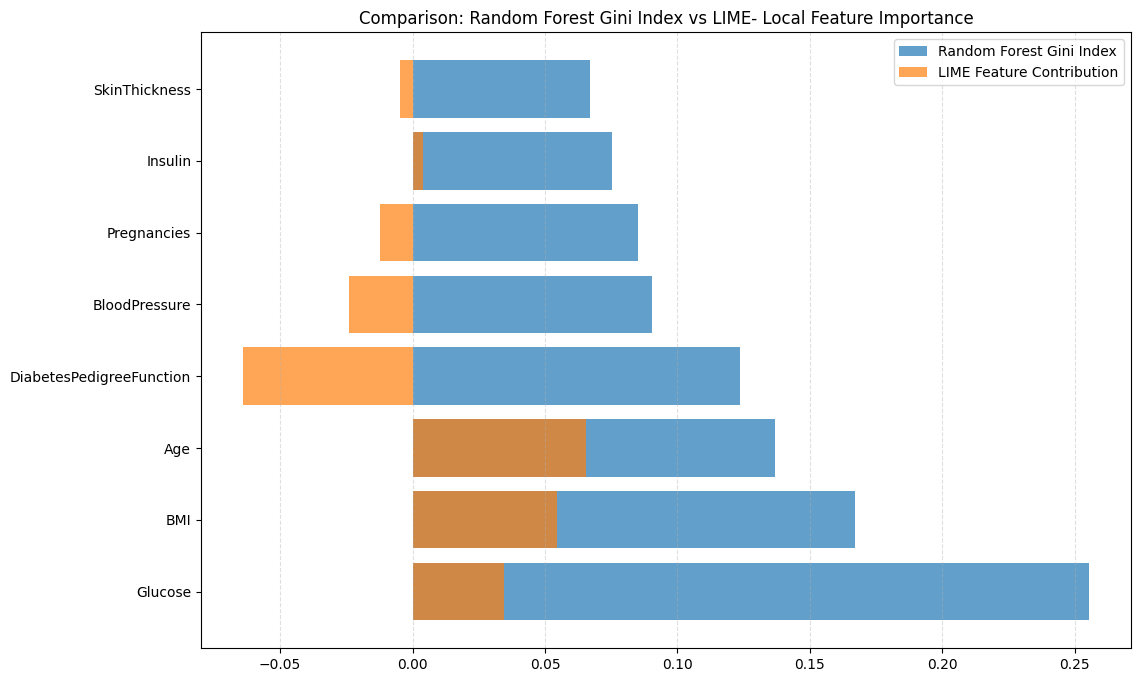

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# RF Gini Index (Global Importance)

gini_features = [
    "Glucose", "BMI", "Age", "DiabetesPedigreeFunction",
    "BloodPressure", "Pregnancies", "Insulin", "SkinThickness"
]

gini_values = [
    0.2552, 0.1671, 0.1367, 0.1235,
    0.0903, 0.0850, 0.0754, 0.0669
]

# LIME Feature Importance (Local)

lime_features = [
    "Age", "DiabetesPedigreeFunction", "BMI", "Glucose",
    "BloodPressure", "Pregnancies", "SkinThickness", "Insulin"
]

lime_values = [
    0.0654, -0.0639, 0.0544, 0.0347,
    -0.0241, -0.0122, -0.0049, 0.004
]

# Create Side-by-Side Comparison

plt.figure(figsize=(12, 8))

# Plot Gini
plt.barh(gini_features, gini_values, alpha=0.7, label="Random Forest Gini Index")

# Plot LIME
plt.barh(lime_features, lime_values, alpha=0.7, label="LIME Feature Contribution")

plt.title("Comparison: Random Forest Gini Index vs LIME- Local Feature Importance")
plt.legend()
plt.grid(axis="x", linestyle="--", alpha=0.4)

plt.show()


In [ ]:
import pandas as pd
# Random Forest Gini Scores
gini_data = {
    'Feature': ['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction',
                'BloodPressure', 'Pregnancies', 'Insulin', 'SkinThickness'],
    'Gini_Importance': [0.2552, 0.1671, 0.1367, 0.1235, 0.0903, 0.0850, 0.0754, 0.0669]
}

df_gini = pd.DataFrame(gini_data)
# LIME Local Importance
lime_local_data = {
    'Feature': ['BMI', 'Pregnancies', 'DiabetesPedigreeFunction', 'Age', 'Insulin',
                'Glucose', 'SkinThickness', 'BloodPressure'],
    'LIME_Local_Importance': [-0.1848, 0.0994, 0.0889, 0.0665, -0.0430,
                              0.0334, -0.0256, -0.0076]
}

df_lime_local = pd.DataFrame(lime_local_data)
# LIME Global Importance
lime_global_data = {
    'Feature': ['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction',
                'Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin'],
    'LIME_Global_Importance': [0.253868, 0.153898, 0.081142, 0.077085,
                               0.061295, 0.021050, 0.015056, 0.014139]
}

df_lime_global = pd.DataFrame(lime_global_data)
# Merge All Tables
df_merged = df_gini.merge(df_lime_local, on='Feature').merge(df_lime_global, on='Feature')

# Sort by Gini importance (optional)
df_merged = df_merged.sort_values(by='Gini_Importance', ascending=False)

df_merged


,Feature,Gini_Importance,LIME_Local_Importance,LIME_Global_Importance
0,Glucose,0.2552,0.0334,0.253868
1,BMI,0.1671,-0.1848,0.153898
2,Age,0.1367,0.0665,0.081142
3,DiabetesPedigreeFunction,0.1235,0.0889,0.077085
4,BloodPressure,0.0903,-0.0076,0.021050
5,Pregnancies,0.0850,0.0994,0.061295
6,Insulin,0.0754,-0.0430,0.014139
7,SkinThickness,0.0669,-0.0256,0.015056


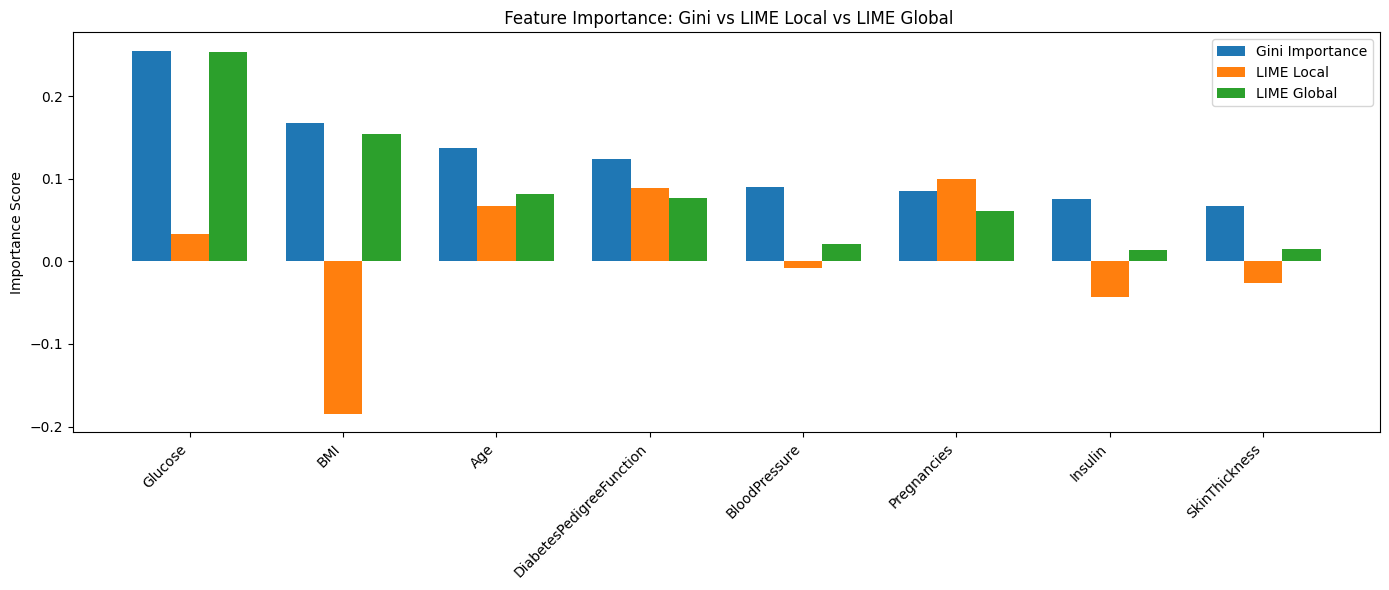

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# -------------------------
# Data
# -------------------------
features = ["Glucose", "BMI", "Age", "DiabetesPedigreeFunction",
            "BloodPressure", "Pregnancies", "Insulin", "SkinThickness"]

gini = [0.2552, 0.1671, 0.1367, 0.1235, 0.0903, 0.0850, 0.0754, 0.0669]
lime_local = [0.0334, -0.1848, 0.0665, 0.0889, -0.0076, 0.0994, -0.0430, -0.0256]
lime_global = [0.253868, 0.153898, 0.081142, 0.077085,
               0.021050, 0.061295, 0.014139, 0.015056]

# -------------------------
# Plot
# -------------------------
x = np.arange(len(features))
width = 0.25  # bar width

plt.figure(figsize=(14,6))

plt.bar(x - width, gini, width, label="Gini Importance")
plt.bar(x, lime_local, width, label="LIME Local")
plt.bar(x + width, lime_global, width, label="LIME Global")

plt.xticks(x, features, rotation=45, ha='right')
plt.ylabel("Importance Score")
plt.title(" Feature Importance: Gini vs LIME Local vs LIME Global")
plt.legend()
plt.tight_layout()
plt.show()


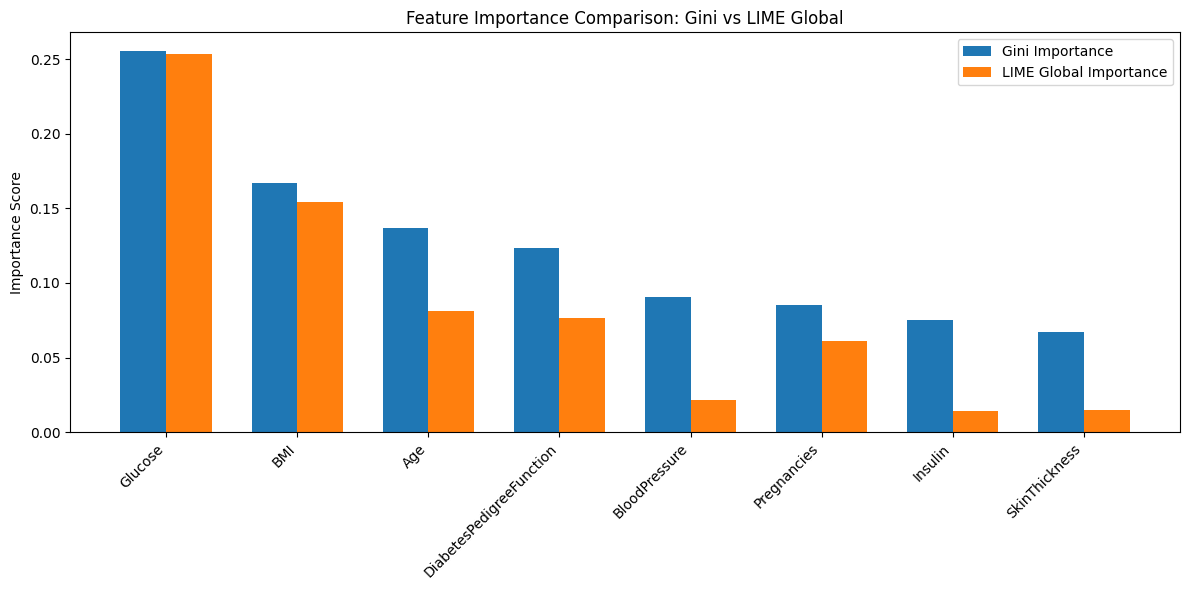

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 1️⃣ Your RF Gini Importance
gini_scores = {
    "Glucose": 0.2552,
    "BMI": 0.1671,
    "Age": 0.1367,
    "DiabetesPedigreeFunction": 0.1235,
    "BloodPressure": 0.0903,
    "Pregnancies": 0.0850,
    "Insulin": 0.0754,
    "SkinThickness": 0.0669
}

# 2️⃣ Your LIME Global Importance
lime_scores = {
    "Glucose": 0.253373,
    "BMI": 0.154318,
    "Age": 0.081258,
    "DiabetesPedigreeFunction": 0.076716,
    "Pregnancies": 0.061378,
    "BloodPressure": 0.021342,
    "SkinThickness": 0.014891,
    "Insulin": 0.014321
}

# Convert to DataFrame for easier plotting
df = pd.DataFrame({
    "Feature": list(gini_scores.keys()),
    "Gini": list(gini_scores.values()),
    "LIME": [lime_scores[f] for f in gini_scores.keys()]
})

# Sorting features by Gini importance (optional)
df = df.sort_values(by="Gini", ascending=False)

# Plot size
plt.figure(figsize=(12, 6))

# X-axis positions
x = np.arange(len(df["Feature"]))
width = 0.35  # width of bars

# Plot bars
plt.bar(x - width/2, df["Gini"], width, label='Gini Importance')
plt.bar(x + width/2, df["LIME"], width, label='LIME Global Importance')

# Labels and formatting
plt.xticks(x, df["Feature"], rotation=45, ha='right')
plt.ylabel("Importance Score")
plt.title("Feature Importance Comparison: Gini vs LIME Global")
plt.legend()
plt.tight_layout()

plt.show()
